In [1]:
import numpy as np

In [3]:
import time
import pandas as pd
import datetime as dt
def read_obs_csv(fname):
    obs = pd.read_csv(fname, parse_dates=['ISO8601',], date_parser=lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')).sort_values(by=['ISO8601'])
    obs["t"] = [time.mktime(obs.ISO8601.iloc[i].timetuple()) for i in range(len(obs))]
    t_min = obs.t.min()
    obs.t -= t_min
    obs_no2 = obs.loc[obs.obstype=='no2']
    return obs_no2
 

In [69]:
import os
dir = "stations"
deltats = []
for fname in os.listdir(dir):
    path = os.path.join(dir, fname)
    print(path)
    obs = read_obs_csv(path)
    if len(obs) > 0:
        deltats.append(obs.t[1:].values - obs.t[:-1].values)
        deltat = deltats[-1][deltats[-1] >= 3600]
        print(np.nanmin(deltat), np.sum(deltat == 3600) / len(deltat))


stations/obs_EEA_PL_PL0317A.csv
3600.0 0.9903128533735394
stations/obs_Station0004436.csv
3600.0 0.9261606219945171
stations/obs_Station0003167.csv
stations/obs_EEA_SK_SK0407A.csv
3600.0 0.9673823902184447
stations/obs_Station0005477.csv
stations/obs_EEA_DE_DE_DENW329.csv
3600.0 0.9640436530729466
stations/obs_Station0005449.csv
3600.0 0.9807046532700816
stations/obs_Station0003213.csv
3600.0 0.9765357429133571
stations/obs_Station0000478.csv
3600.0 0.9410925281123351
stations/obs_Station0000468.csv
3600.0 0.9615342822992502
stations/obs_EEA_SE_SE0104A.csv
3600.0 0.9915848527349228
stations/obs_Station0002646.csv
3600.0 0.9645927903871829
stations/obs_EEA_FR_FR08017.csv
stations/obs_Station0000899.csv
3600.0 0.9558823529411765
stations/obs_Station0000734.csv
3600.0 0.9619547570083342
stations/obs_JPN_Tokyo_13117520.csv
3600.0 0.9854713313896988
stations/obs_EEA_IE_IE.IE001DP.csv
stations/obs_EEA_PL_PL0560A.csv
3600.0 0.9893350810295519
stations/obs_Station0004330.csv
3600.0 0.991354466

KeyboardInterrupt: 

,ISO8601,original_station_name,lat,lon,obstype,conc_obs,conc_obs.1,conc_unit,t


In [15]:
obs.t[1:]

3           10800.0
8           14400.0
10          18000.0
14          21600.0
17          25200.0
            ...    
49956    69642000.0
49958    69645600.0
49961    69649200.0
49964    69652800.0
49967    69656400.0
Name: t, Length: 16589, dtype: float64

(0.0, 300000.0)

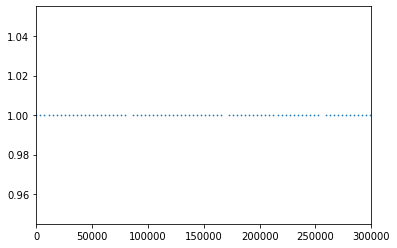

In [37]:
import matplotlib.pyplot as plt
plt.scatter(obs.t, np.ones(len(obs.t)), s=0.5)
l = [0, 300000]
plt.xlim(l)
# plt.ylim(l)

Text(0, 0.5, 'time until next observation')

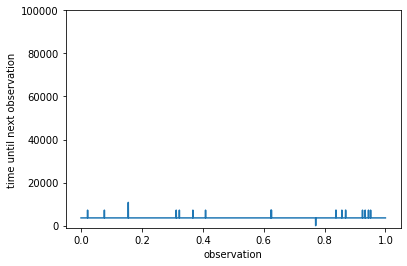

In [68]:
i = 8
plt.plot(np.linspace(0, 1, len(deltats[i])), deltats[i])
plt.ylim([-1000, 100_000])
plt.xlabel("observation")
plt.ylabel("time until next observation")